In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [41]:

def extract():
    chunk_size = 100
    offset = 100
    data_types = {'DR_NO': int, 'TIME OCC': int, 'AREA': int, 'AREA NAME': str,
                'Rpt Dist No': int, 'Part 1-2': 'category', 'Crm Cd': int, 'Crm Cd Desc': str, 'Mocodes': str,
                'Vict Age': int, 'Vict Sex': 'category', 'Vict Descent': str, 'Premis Cd': float, 'Premis Desc': str,
                'Weapon Used Cd': float, 'Weapon Desc': str, 'Status': 'category', 'Status Desc': 'category', 'Crm Cd 1': float,
                'Crm Cd 2': float, 'Crm Cd 3': float, 'Crm Cd 4': float, 'LOCATION': str, 'Cross Street': str, 'LAT': float,
                'LON': float}
    first_df = pd.read_csv('../data/crime_data.csv', dtype=data_types, skiprows=0, nrows=chunk_size, parse_dates=['Date Rptd', 'DATE OCC'])
    yield first_df
    move_on = True
    while move_on:
        df = pd.read_csv('../data/crime_data.csv', dtype=data_types, skiprows=offset, nrows=chunk_size, header=None, names=first_df.columns, parse_dates=['Date Rptd', 'DATE OCC'])
        offset += chunk_size
        yield df
        if len(df) < chunk_size:
            move_on = False

In [42]:
for df in extract():
    pass

In [38]:
import json
json_dict = json.loads(first_df.to_json(orient='records'))

In [33]:
json_dict[0]

{'DR_NO': 10304468,
 'Date Rptd': 1578441600000,
 'DATE OCC': 1578441600000,
 'TIME OCC': 2230,
 'AREA': 3,
 'AREA NAME': 'Southwest',
 'Rpt Dist No': 377,
 'Part 1-2': '2',
 'Crm Cd': 624,
 'Crm Cd Desc': 'BATTERY - SIMPLE ASSAULT',
 'Mocodes': '0444 0913',
 'Vict Age': 36,
 'Vict Sex': 'F',
 'Vict Descent': 'B',
 'Premis Cd': 501.0,
 'Premis Desc': 'SINGLE FAMILY DWELLING',
 'Weapon Used Cd': 400.0,
 'Weapon Desc': 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
 'Status': 'AO',
 'Status Desc': 'Adult Other',
 'Crm Cd 1': 624.0,
 'Crm Cd 2': None,
 'Crm Cd 3': None,
 'Crm Cd 4': None,
 'LOCATION': '1100 W  39TH                         PL',
 'Cross Street': None,
 'LAT': 34.0141,
 'LON': -118.2978}

In [35]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
df.head(5).to_json(orient='records')

'[{"DR_NO":10304468,"Date Rptd":"01\\/08\\/2020 12:00:00 AM","DATE OCC":"01\\/08\\/2020 12:00:00 AM","TIME OCC":2230,"AREA":3,"AREA NAME":"Southwest","Rpt Dist No":377,"Part 1-2":2,"Crm Cd":624,"Crm Cd Desc":"BATTERY - SIMPLE ASSAULT","Mocodes":"0444 0913","Vict Age":36,"Vict Sex":"F","Vict Descent":"B","Premis Cd":501.0,"Premis Desc":"SINGLE FAMILY DWELLING","Weapon Used Cd":400.0,"Weapon Desc":"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)","Status":"AO","Status Desc":"Adult Other","Crm Cd 1":624.0,"Crm Cd 2":null,"Crm Cd 3":null,"Crm Cd 4":null,"LOCATION":"1100 W  39TH                         PL","Cross Street":null,"LAT":34.0141,"LON":-118.2978},{"DR_NO":190101086,"Date Rptd":"01\\/02\\/2020 12:00:00 AM","DATE OCC":"01\\/01\\/2020 12:00:00 AM","TIME OCC":330,"AREA":1,"AREA NAME":"Central","Rpt Dist No":163,"Part 1-2":2,"Crm Cd":624,"Crm Cd Desc":"BATTERY - SIMPLE ASSAULT","Mocodes":"0416 1822 1414","Vict Age":25,"Vict Sex":"M","Vict Descent":"H","Premis Cd":102.0,"Premis Desc":"SI

In [9]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708079,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822,48,M,O,717.0,HEALTH SPA/GYM,NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
708080,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,23,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
708081,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
708082,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915


In [12]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [12]:
for col in df.columns:
    print(col, len(df[col].value_counts()))

DR_NO 708084
Date Rptd 1210
DATE OCC 1210
TIME OCC 1439
AREA 21
AREA NAME 21
Rpt Dist No 1194
Part 1-2 2
Crm Cd 138
Crm Cd Desc 138
Mocodes 240477
Vict Age 102
Vict Sex 4
Vict Descent 20
Premis Cd 311
Premis Desc 306
Weapon Used Cd 79
Weapon Desc 79
Status 6
Status Desc 6
Crm Cd 1 140
Crm Cd 2 120
Crm Cd 3 36
Crm Cd 4 6
LOCATION 61678
Cross Street 9187
LAT 5382
LON 4961


In [11]:
for col in df.columns:
    null_df = df[df[col].isna() == True]
    null_count = len(null_df)
    if (null_count != 0):
        print(col, null_count, str(len(df) - null_count))

Mocodes 97302 610782
Vict Sex 92642 615442
Vict Descent 92648 615436
Premis Cd 8 708076
Premis Desc 385 707699
Weapon Used Cd 462147 245937
Weapon Desc 462147 245937
Crm Cd 1 9 708075
Crm Cd 2 655377 52707
Crm Cd 3 706310 1774
Crm Cd 4 708030 54
Cross Street 593460 114624


In [15]:
df['Mocodes'][2]

'1501'

In [17]:
df[df['Cross Street'].isna() == False]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
10,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
17,200506268,02/22/2020 12:00:00 AM,02/22/2020 12:00:00 AM,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0319 0344 0429 0448 0305,29,F,W,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,440.0,624.0,NaN,NaN,PACIFIC COAST,VERMONT,33.7926,-118.3043
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,0416 0411 0344 1822 0305 0334 2004 1414 1202 1218,66,M,B,103.0,ALLEY,204.0,FOLDING KNIFE,IC,Invest Cont,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
27,200100552,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,2000,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2004 0305 0411 1202 1414 1402 1822 0906,71,M,W,148.0,PUBLIC RESTROOM/OUTSIDE*,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,230.0,NaN,NaN,NaN,ALAMEDA,LOS ANGELES,34.0578,-118.2371
34,200100568,01/27/2020 12:00:00 AM,01/27/2020 12:00:00 AM,1500,1,Central,166,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1402 0910 0444 0443 0334 1202 1822 2051 2049,69,M,B,801.0,MTA BUS,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,930.0,998.0,NaN,NaN,6TH,SAN JULIAN,34.0428,-118.2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708034,231405988,02/17/2023 12:00:00 AM,02/17/2023 12:00:00 AM,1540,14,Pacific,1445,2,624,BATTERY - SIMPLE ASSAULT,0416,17,F,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,VENICE,BEETHOVEN,33.9998,-118.4412
708037,231207909,03/06/2023 12:00:00 AM,03/06/2023 12:00:00 AM,5,12,77th Street,1208,1,210,ROBBERY,0913 0344 0334 0355 0302,53,M,B,101.0,STREET,106.0,UNKNOWN FIREARM,IC,Invest Cont,210.0,NaN,NaN,NaN,47TH ST,FIGUEROA ST,34.0007,-118.2827
708038,231607058,04/07/2023 12:00:00 AM,04/07/2023 12:00:00 AM,1735,16,Foothill,1612,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0416,35,M,H,108.0,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,JA,Juv Arrest,230.0,NaN,NaN,NaN,PAXTON,SAN FERNANDO,34.2720,-118.4284
708061,230307052,02/28/2023 12:00:00 AM,02/27/2023 12:00:00 AM,1900,3,Southwest,338,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,522.0,NaN,NaN,NaN,MCCLINTOCK AV,HOOVER ST,34.0268,-118.2896


In [20]:
def change_column_names(df):
    cols = df.columns
    for col in cols:
        new_col = str(col).lower().replace(' ', '_')
        print(new_col) 

In [23]:
change_column_names(df)

dr_no
date_rptd
date_occ
time_occ
area
area_name
rpt_dist_no
part_1-2
crm_cd
crm_cd_desc
mocodes
vict_age
vict_sex
vict_descent
premis_cd
premis_desc
weapon_used_cd
weapon_desc
status
status_desc
crm_cd_1
crm_cd_2
crm_cd_3
crm_cd_4
location
cross_street
lat
lon


In [18]:
from dask import dataframe as dd

dask_df = dd.read_csv('data/crime_data.csv')

In [19]:
dask_df.head()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+--------------+---------+----------+
| Column       | Found   | Expected |
+--------------+---------+----------+
| Crm Cd 1     | float64 | int64    |
| Cross Street | object  | float64  |
| Premis Cd    | float64 | int64    |
+--------------+---------+----------+

The following columns also raised exceptions on conversion:

- Cross Street
  ValueError("could not convert string to float: 'OLIVE'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'Crm Cd 1': 'float64',
       'Cross Street': 'object',
       'Premis Cd': 'float64'}

to the call to `read_csv`/`read_table`.

In [57]:
#################################
df = pd.read_csv('../data/crime_data.csv')

In [18]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [58]:
df['Rpt Dist No'].value_counts().__len__()

1194

In [33]:
df['hour_occ'] = df['TIME OCC'].apply(lambda x: int(x/100))

In [ ]:
df['vict_sex_numeric'] = df['Vict Sex'].replace(['F', 'M', 'X'],
                        [0, 1, 2], inplace=True)

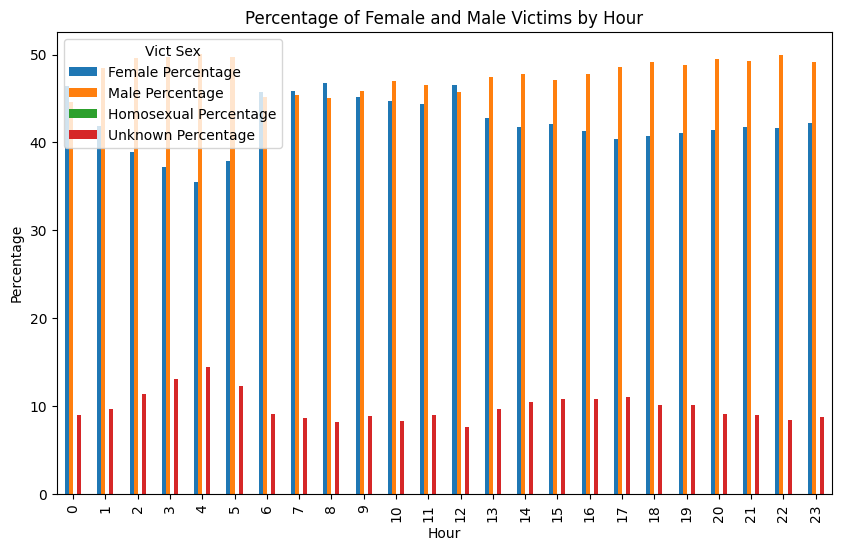

In [51]:
grouped_data = df[['hour_occ', 'Vict Sex']].groupby(['hour_occ', 'Vict Sex']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot(index='hour_occ', columns='Vict Sex', values='Count')
pivot_data['Total'] = pivot_data.sum(axis=1)

# Calculate the percentage of each sex for each hour
pivot_data['Female Percentage'] = pivot_data['F'] / pivot_data['Total'] * 100
pivot_data['Male Percentage'] = pivot_data['M'] / pivot_data['Total'] * 100
pivot_data['Homosexual Percentage'] = pivot_data['H'] / pivot_data['Total'] * 100
pivot_data['Unknown Percentage'] = pivot_data['X'] / pivot_data['Total'] * 100

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data[['Female Percentage', 'Male Percentage', 'Homosexual Percentage', 'Unknown Percentage']].plot(ax=ax, kind='bar')
ax.set_xlabel('Hour')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Female and Male Victims by Hour')
plt.show()

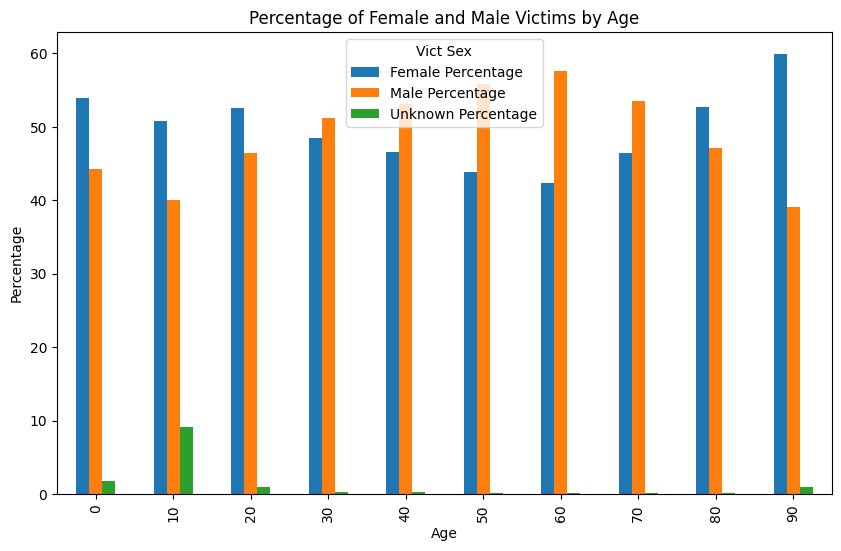

In [93]:
age_ranges = range(0, 100, 10)
df['Age Group'] = pd.cut(df['Vict Age'], bins=10, labels=age_ranges)
df = df[df['Vict Age'] > 0][df['Vict Age'] < 99].reset_index(drop=True)
grouped_data = df[['Age Group', 'Vict Sex']].groupby(['Age Group', 'Vict Sex']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot(index='Age Group', columns='Vict Sex', values='Count')
pivot_data['Total'] = pivot_data.sum(axis=1)

# Calculate the percentage of each sex for each hour
pivot_data['Female Percentage'] = pivot_data['F'] / pivot_data['Total'] * 100
pivot_data['Male Percentage'] = pivot_data['M'] / pivot_data['Total'] * 100
pivot_data['Homosexual Percentage'] = pivot_data['H'] / pivot_data['Total'] * 100
pivot_data['Unknown Percentage'] = pivot_data['X'] / pivot_data['Total'] * 100

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data[['Female Percentage', 'Male Percentage', 'Unknown Percentage']].plot(ax=ax, kind='bar')
# pivot_data[['Homosexual Percentage']].plot(ax=ax, kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Female and Male Victims by Age')
plt.show()

C:\Users\gxsla\AppData\Local\Temp\ipykernel_5384\3474336229.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[df['Vict Age'] > 60][df['Vict Age'] < 70].reset_index(drop=True)


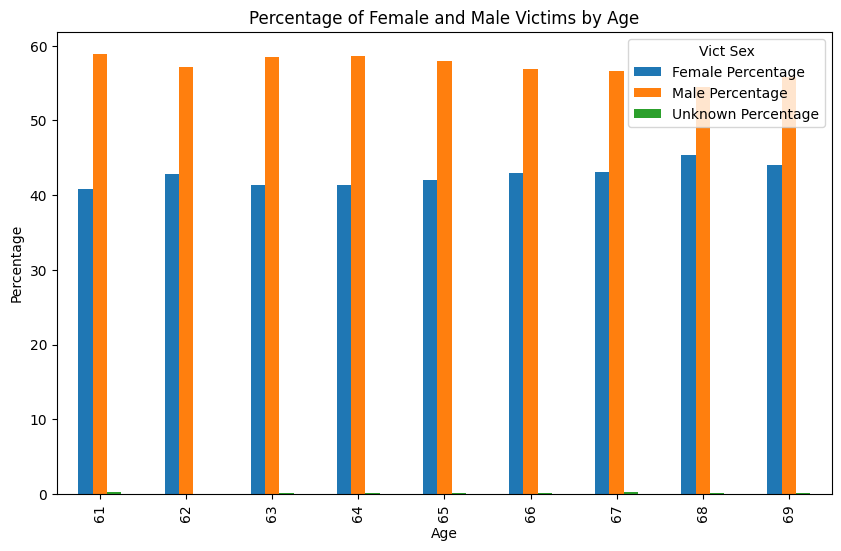

In [94]:
df2 = df[df['Vict Age'] > 60][df['Vict Age'] < 70].reset_index(drop=True)
grouped_data = df2[['Vict Age', 'Vict Sex']].groupby(['Vict Age', 'Vict Sex']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot(index='Vict Age', columns='Vict Sex', values='Count')
pivot_data['Total'] = pivot_data.sum(axis=1)

# Calculate the percentage of each sex for each hour
pivot_data['Female Percentage'] = pivot_data['F'] / pivot_data['Total'] * 100
pivot_data['Male Percentage'] = pivot_data['M'] / pivot_data['Total'] * 100
pivot_data['Homosexual Percentage'] = pivot_data['H'] / pivot_data['Total'] * 100
pivot_data['Unknown Percentage'] = pivot_data['X'] / pivot_data['Total'] * 100

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data[['Female Percentage', 'Male Percentage', 'Unknown Percentage']].plot(ax=ax, kind='bar')
# pivot_data[['Homosexual Percentage']].plot(ax=ax, kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Female and Male Victims by Age')
plt.show()